
File Name : CrimeDataAnalysis_Part_2.ipynb

Author : S.Srihari

Date : 12-18-18



In [1]:
import os
import pandas as pd
import webbrowser
import numpy as np

import seaborn as sns
sns.set()
%matplotlib inline
from DataExtractor import DataExtractor
from VizTools import *


In [2]:
# Set the path variables
_path = os.path.join(os.getcwd(), "datasets/crime")

db = 'crime_data'

start_year = 2001
end_year = 2017
all_year_data = []

columns_to_select = ["Arrest", 
                     "Date", 
                     "Year", 
                     "crime_count", 
                     "day", 
                     "month", 
                     "`Primary Type`"
                     ]

for year in range(start_year, end_year+1):
    # print("Pulling year:", year)
    cols = ''.join(s+", " for s in columns_to_select)
    query = "SELECT " + cols[:-2] + " FROM crime_" + str(year) + ";"
    # print(query)
    data_extractor = DataExtractor()
    year_df = data_extractor.read_db(db=db, query=query)
    print("Pulled", year_df.shape[0], "rows of data for year", year)
    # print(year_df.shape)
    all_year_data.append(year_df)

Pulled 485560 rows of data for year 2001


Pulled 486596 rows of data for year 2002


Pulled 475732 rows of data for year 2003


Pulled 469167 rows of data for year 2004


Pulled 453520 rows of data for year 2005


Pulled 447924 rows of data for year 2006


Pulled 436793 rows of data for year 2007


Pulled 426866 rows of data for year 2008


Pulled 392498 rows of data for year 2009


Pulled 370152 rows of data for year 2010


Pulled 351619 rows of data for year 2011


Pulled 335788 rows of data for year 2012


Pulled 306918 rows of data for year 2013


Pulled 275071 rows of data for year 2014


Pulled 263771 rows of data for year 2015


Pulled 268691 rows of data for year 2016


Pulled 267626 rows of data for year 2017


In [4]:

print_columns(all_year_data[0])


Dataframe columns :
	 Arrest	 Date	 Year	 crime_count	 day	 month	 Primary Type

Use the pareto principle to decide which crimes contribute towards 20% of all distribtions

In [6]:
crime_df = pd.DataFrame(columns=["Primary Type", "Count", "Year"])
for year_data in all_year_data:
    crime_groups = year_data["Primary Type"].value_counts()
    crime_groups = pd.DataFrame(crime_groups).reset_index()
    crime_groups["Year"] = year_data["Year"].unique()[0]
    crime_groups.columns = ["Primary Type", "Count", "Year"]
    crime_df = crime_df.append(crime_groups, ignore_index=True)

In [8]:
crime_df.head()

,Primary Type,Count,Year
0,THEFT,99193,2001
1,BATTERY,93446,2001
2,CRIMINAL DAMAGE,55839,2001
3,NARCOTICS,50567,2001
4,ASSAULT,31382,2001


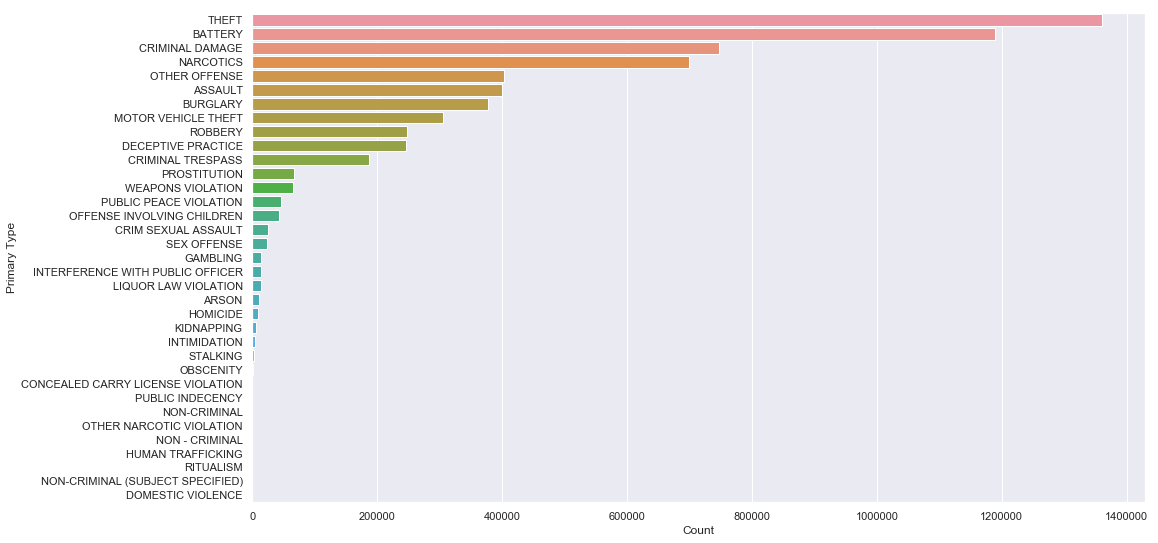

In [9]:
crime_levels = crime_df[["Primary Type", "Count"]].groupby(by="Primary Type", as_index=False).sum()
crime_levels.sort_values(by="Count", inplace=True, ascending=False)
crime_levels.reset_index(drop=True, inplace=True)
plt.figure(figsize=(16, 9))
sns.barplot(x="Count", y="Primary Type", data=crime_levels)


In [10]:
# Crimes to monitor
crime_levels.head()
crime_levels["Count_cdf"] = crime_levels["Count"].cumsum() / crime_levels["Count"].sum()
crime_levels

,Primary Type,Count,Count_cdf
0,THEFT,1361291,0.208970
1,BATTERY,1188557,0.391424
2,CRIMINAL DAMAGE,747054,0.506103
3,NARCOTICS,699803,0.613529
4,OTHER OFFENSE,403541,0.675476
5,ASSAULT,400651,0.736979
6,BURGLARY,377813,0.794977
7,MOTOR VEHICLE THEFT,305638,0.841895
8,ROBBERY,247254,0.879850
9,DECEPTIVE PRACTICE,246502,0.917691


In [11]:
# Find the cdf value that is closest to the cut off value
cut_off_cdf = 0.8
idx = crime_levels.loc[(crime_levels['Count_cdf']-cut_off_cdf).abs() ==
                       (crime_levels['Count_cdf']-cut_off_cdf).abs().min()].index.values[0]

crime_groups_subset = crime_levels.iloc[:idx+1, :]
crime_groups_subset

,Primary Type,Count,Count_cdf
0,THEFT,1361291,0.208970
1,BATTERY,1188557,0.391424
2,CRIMINAL DAMAGE,747054,0.506103
3,NARCOTICS,699803,0.613529
4,OTHER OFFENSE,403541,0.675476
5,ASSAULT,400651,0.736979
6,BURGLARY,377813,0.794977


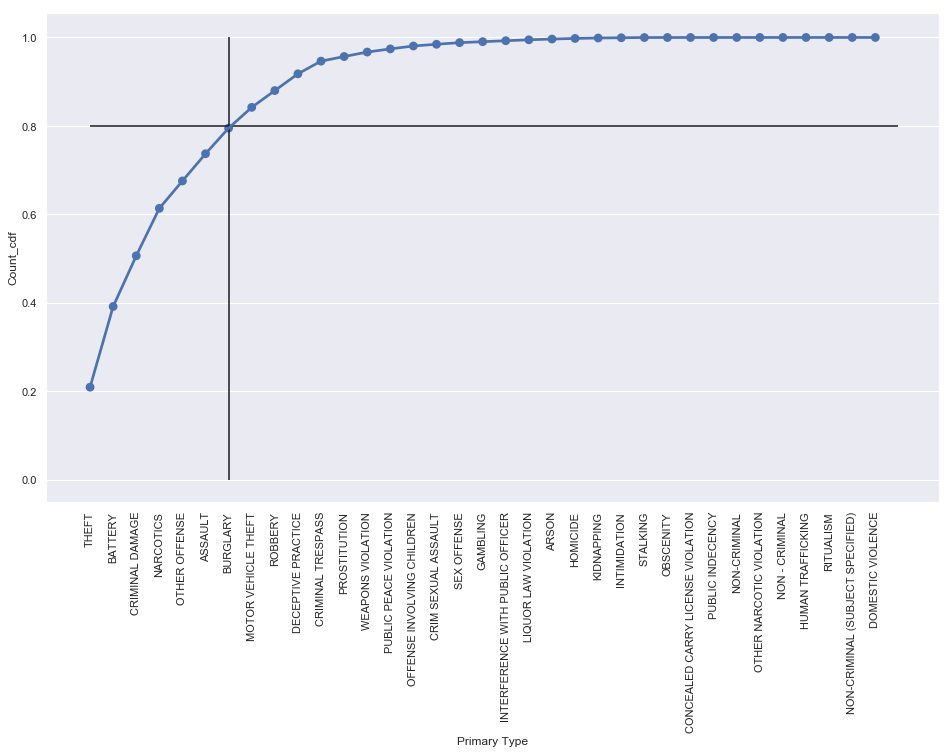

In [12]:
plt.figure(figsize=(16, 9))
g = sns.pointplot(y="Count_cdf", x="Primary Type", data=crime_levels, sort=False).\
    set_xticklabels(rotation=90, labels=crime_levels["Primary Type"])
plt.hlines(y=cut_off_cdf, xmin=0, xmax=len(crime_levels["Primary Type"].unique()))
plt.vlines(x=idx, ymin=0, ymax=1)

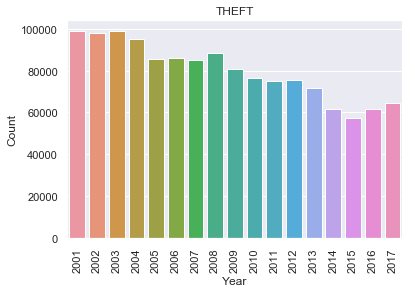

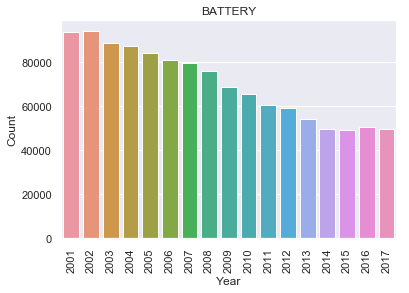

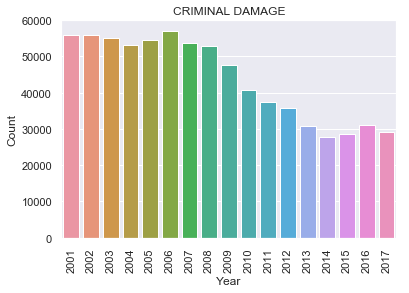

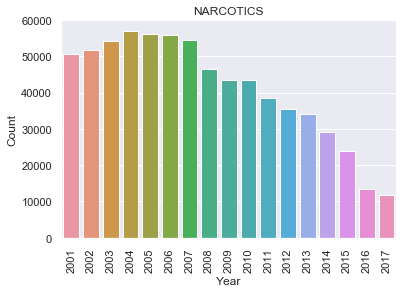

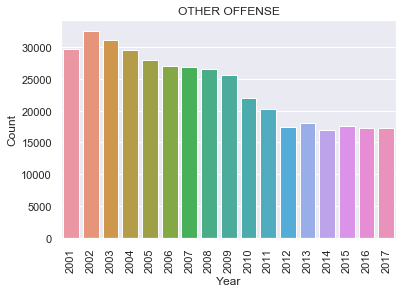

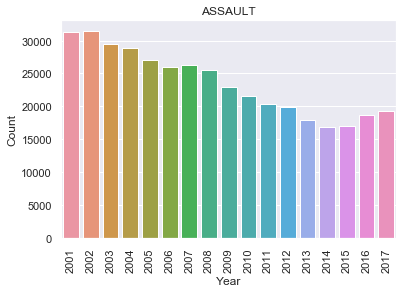

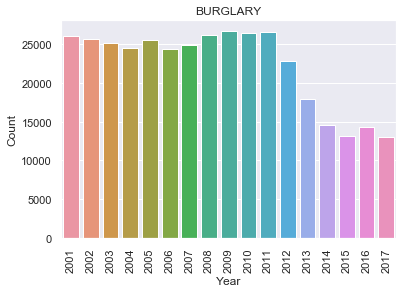

In [13]:
# Let's analyse what this crime subset can tell us
most_occuring_crimes = list(crime_groups_subset["Primary Type"].unique())
common_crime_df = crime_df[crime_df["Primary Type"].isin(most_occuring_crimes)]
for i in range(0, len(most_occuring_crimes)):
    temp_df = common_crime_df[common_crime_df["Primary Type"]==most_occuring_crimes[i]]
    sns.barplot(x="Year", y="Count",
                data=temp_df).\
    set_xticklabels(rotation=90, labels=temp_df["Year"])
    plt.title(most_occuring_crimes[i])
    plt.show()